# Explore here

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

file_path = "../data/raw/AB_NYC_2019.csv"
data = pd.read_csv(file_path)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


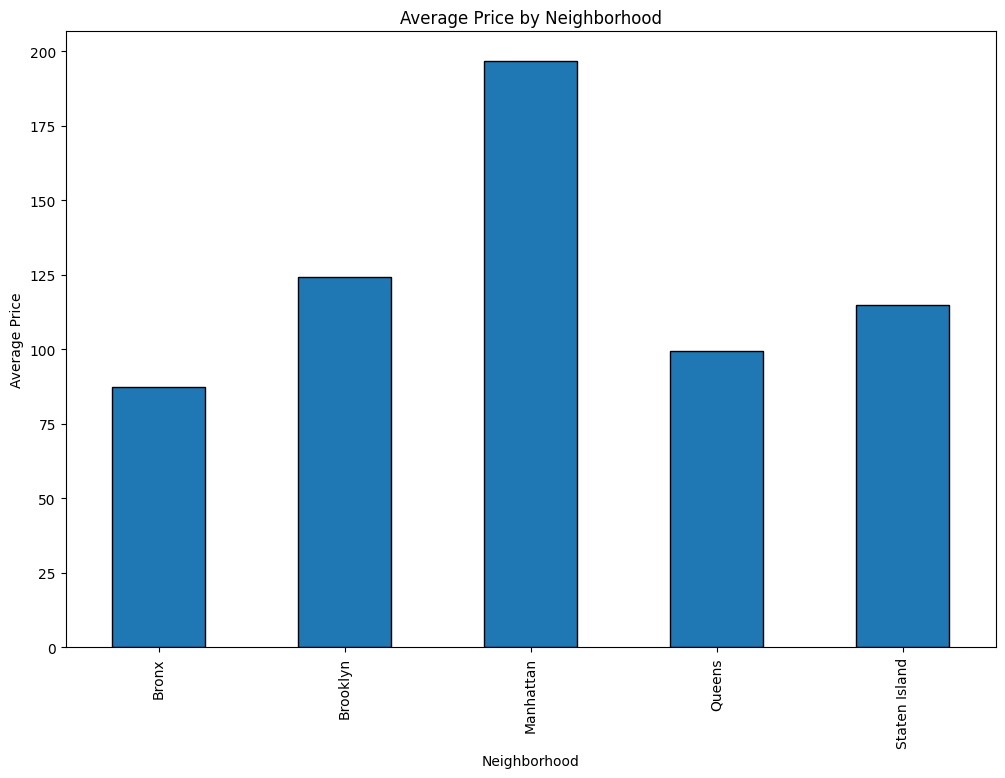

In [2]:
# Group by neighborhood and calculate the average price
average_price_by_neighborhood = data.groupby('neighbourhood_group')['price'].mean()

# Plot bar chart for the average price by neighborhood
plt.figure(figsize=(12, 8))
average_price_by_neighborhood.plot(kind='bar', edgecolor='black')

# Add title and labels
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')

# Show the plot
plt.show()

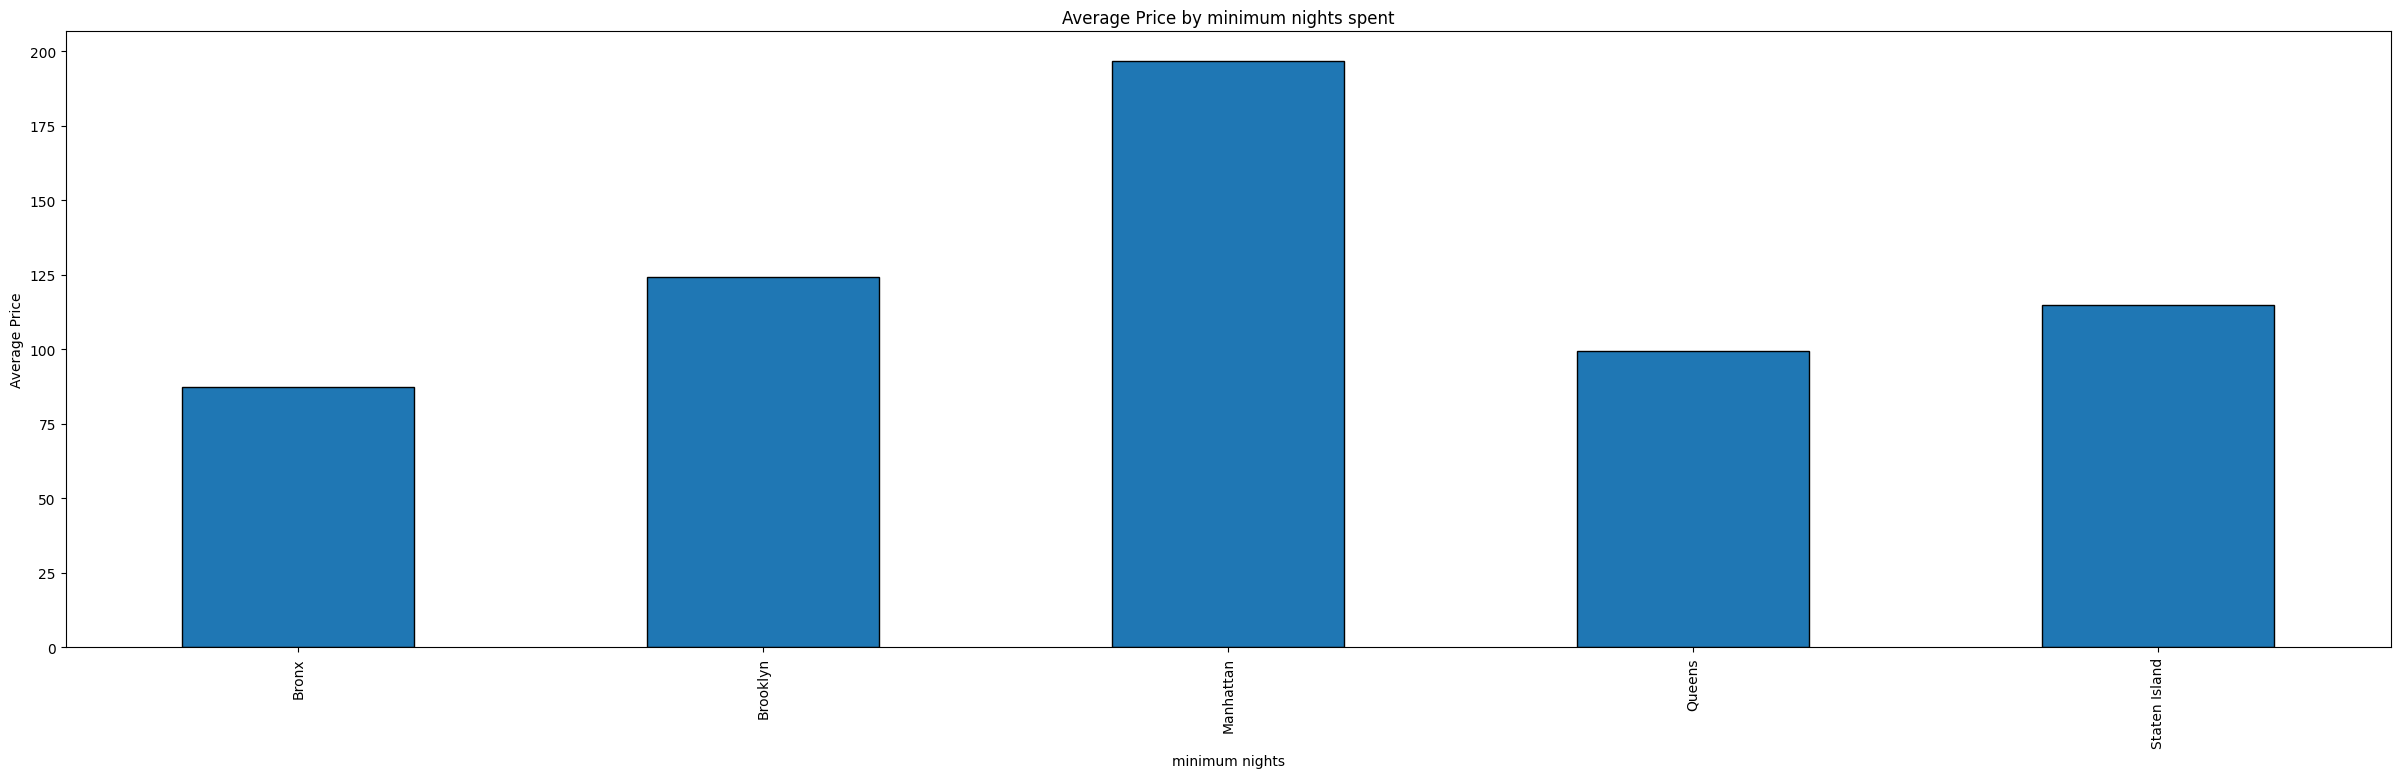

In [3]:
average_price_by_minimum_nights = data.groupby('minimum_nights')['price'].mean()

# Plot bar chart for the average price by neighborhood
plt.figure(figsize=(30, 8))
average_price_by_neighborhood.plot(kind='bar', edgecolor='black')

# Add title and labels
plt.title('Average Price by minimum nights spent')
plt.xlabel('minimum nights')
plt.ylabel('Average Price')

# Show the plot
plt.show()

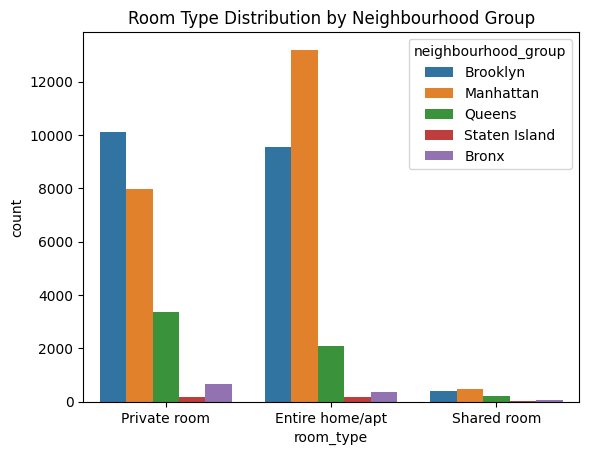

In [4]:
import seaborn as sns

sns.countplot(data=data, x="room_type", hue="neighbourhood_group")
plt.title('Room Type Distribution by Neighbourhood Group')
plt.show()


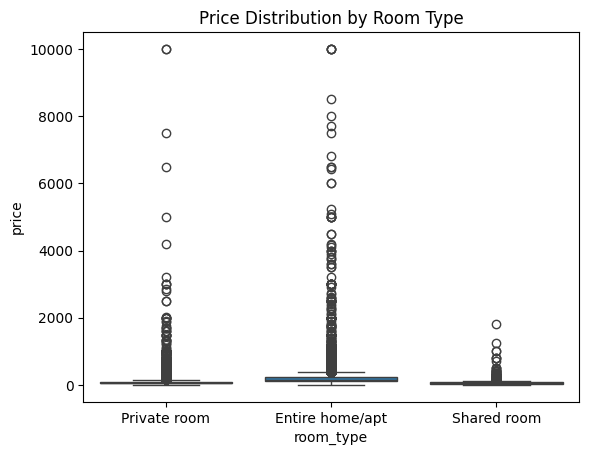

In [5]:
sns.boxplot(data=data, x="room_type", y="price")
plt.title('Price Distribution by Room Type')
plt.show()


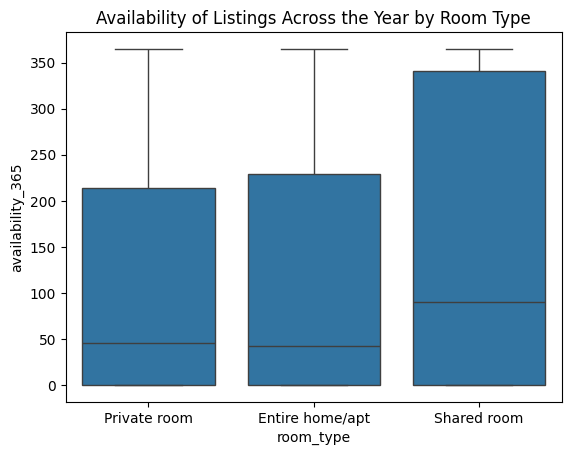

In [6]:
sns.boxplot(data=data, x="room_type", y="availability_365")
plt.title('Availability of Listings Across the Year by Room Type')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

relative_info = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

x = data.loc[:, relative_info]

y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled, X_train_scaled)

[[-0.19302532  0.86890066 -0.39704238 -0.18656961  0.5730576 ]
 [ 0.64524846 -0.52439587         nan -0.18656961 -0.30676511]
 [-0.23959609 -0.14236295 -0.56286016 -0.18656961 -0.86044664]
 ...
 [-0.28616685 -0.41203325 -0.33189968 -0.09613245 -0.82252325]
 [-0.23959609 -0.52439587         nan -0.18656961 -0.86044664]
 [-0.19302532  0.10483482 -0.62208079 -0.18656961  1.90037633]] [[-0.19302532 -0.2771981  -0.30228936 -0.18656961 -0.85286196]
 [-0.23959609 -0.47945082 -0.72275587 -0.18656961 -0.86044664]
 [-0.23959609 -0.52439587         nan -0.15642389 -0.86044664]
 ...
 [ 1.06438535 -0.50192335 -0.61615873 -0.06598673  1.11915445]
 [-0.23959609 -0.2771981  -0.74052207 -0.18656961 -0.84527728]
 [-0.09988379 -0.50192335 -0.7997427  -0.18656961 -0.86044664]]
